<a href="https://colab.research.google.com/github/rackysingh/hb-data-analysis-python/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
#importing libraries-

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick


In [2]:
#mounting drive

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
hoteld1 = "/content/drive/MyDrive/Almabetter/PROJECT (Hotel Booking Analysis)/data.csv/"

In [12]:
hoteldb = pd.read_csv('/content/drive/MyDrive/Almabetter/PROJECT (Hotel Booking Analysis)/data.csv')


## Copy the dataset
hoteldb = hoteldb.copy()

In [5]:
hoteldb.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
#last 5 rows

hoteldb.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [7]:
#calculate basic statistical data-

hoteldb.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
# Gives a list of columns

list(hoteldb.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [10]:
#total rows and columns count

hoteldb.shape

(119390, 32)

In [11]:
#Prints number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column-

hoteldb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [17]:
#checks Datatypes

hoteldb.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [18]:
#@title FOR CHECKING UNIQUE CONTENTS
hoteldb['hotel'].unique()


array(['Resort Hotel', 'City Hotel'], dtype=object)

In [19]:
hoteldb['is_canceled'].unique()

array([0, 1])

In [20]:
hoteldb['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [21]:
hoteldb['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [22]:
hoteldb['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [23]:
#@title Now, we'll perform a quick check for missing/Null values
#check for missing values

In [24]:
hoteldb.isnull().sum().sort_values(ascending=False)[:10]


company                   112593
agent                      16340
country                      488
children                       4
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
hotel                          0
previous_cancellations         0
dtype: int64

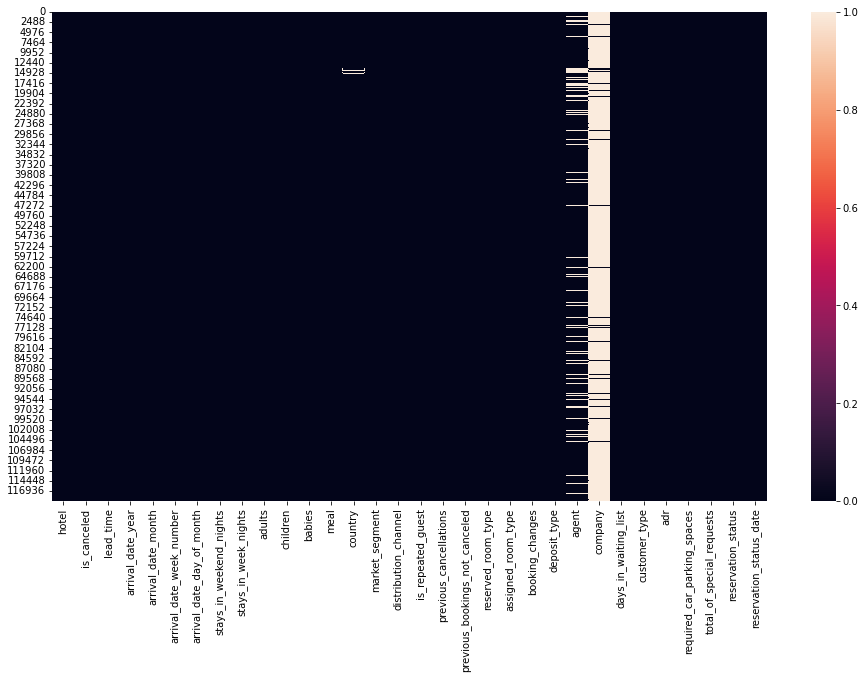

In [25]:
# visualize missing value using heatmap to get idea where is the value missing

plt.figure(figsize=(16,9))
sns.heatmap(hoteldb.isnull())

We have 4 features with missing values.

In the agent and the company column, we have id_number for each agent or company, so for all the missing values, we will just replace it with 0.

# New Section

In [26]:
# We have 4 features with missing values.In the agent and the company column, we have id_number for each agent or company, so for all the missing values, we will just replace it with 0.
# If no id of agent or company is null, just replace it with 0
hoteldb[['agent','company']] = hoteldb[['agent','company']].fillna(0.0)

In [27]:
## For the missing values in the country column, replace it with mode (value that appears most often)
hoteldb['country'].fillna(hoteldb.country.mode().to_string(), inplace=True)


Children column contains the count of children, so we will replace all the missing values with the rounded mean value.

In [28]:
## for missing children value, replace it with rounded mean value
hoteldb['children'].fillna(round(hoteldb.children.mean()), inplace=True)

In [29]:
#There are many rows that have zero guests including adults, children and babies. These type of rows does not make
hoteldb[(hoteldb.adults+hoteldb.babies+hoteldb.children)==0].shape


(180, 32)

We have 180 such rows. we will just remove these rows.





In [30]:
## Drop Rows where there is no adult, baby and child
hoteldb = hoteldb.drop(hoteldb[(hoteldb.adults+hoteldb.babies+hoteldb.children)==0].index)
hoteldb.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [31]:
hoteldb.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

We can see different data types for different columns.



In [32]:
## convert datatype of these columns from float to integer
hoteldb[['children', 'company', 'agent']] = hoteldb[['children', 'company', 'agent']].astype('int64')


In [33]:
#@title Exploratory Data Analysis
#Let’s write the function to get the percentage of different values.

def get_count(series, limit=None):
    
    '''
    INPUT:
        series: Pandas Series (Single Column from DataFrame)
        limit:  If value given, limit the output value to first limit samples.
    OUTPUT:
        x = Unique values
        y = Count of unique values
    '''
    
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

In [ ]:
#Now let’s use this function on our is_canceled feature and see the result

x,y = get_count(hoteldb['is_canceled'])
x,y

(array([0, 1]), array([62.92341247, 37.07658753]))

In [ ]:
#plot the digram through write function
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'):
    
    '''
    INPUT:
        x:        Array containing values for x-axis
        y:        Array containing values for y-axis
        x_lable:  String value for x-axis label
        y_lable:  String value for y-axis label
        title:    String value for plot title
        figsize:  tuple value, for figure size
        type:     type of plot (default is bar plot)
        
    OUTPUT:
        Display the plot
    '''
    
    sns.set_style('darkgrid')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax, sort=False)
        
    
    plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


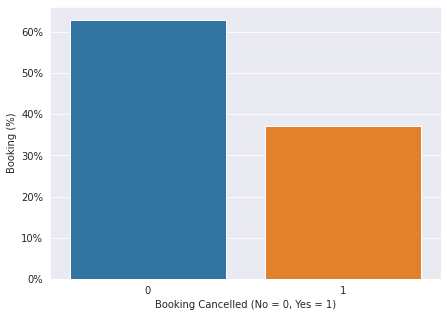

In [ ]:
#Now let’s call the function

plot(x,y, x_label='Booking Cancelled (No = 0, Yes = 1)', y_label='Booking (%)')


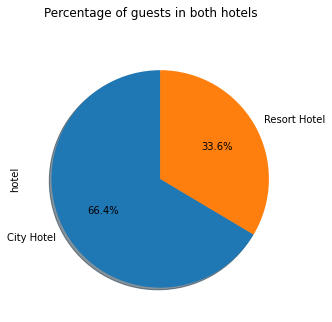

In [15]:
#@title NOW WE HAVE CLEAN DATA FOR PROPER EDA
#Booking ratio of both hotels

dff=hoteldb['hotel'].value_counts()
diagram=dff.plot(kind='pie', subplots=True, shadow = True,startangle=90,figsize=(10,5), autopct='%1.1f%%', title = 'Percentage of guests in both hotels' )

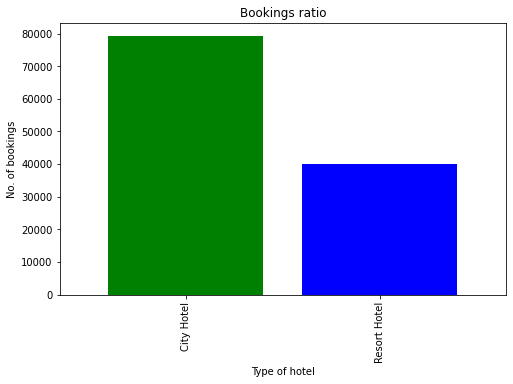

In [13]:
#bookings statistics of both hotels

df=hoteldb['hotel'].value_counts()
df.plot(kind='bar',width=.8 ,color=['green','blue'],figsize = (8, 5))
plt.xlabel("Type of hotel")
plt.ylabel("No. of bookings")
plt.title("Bookings ratio")
plt.show()

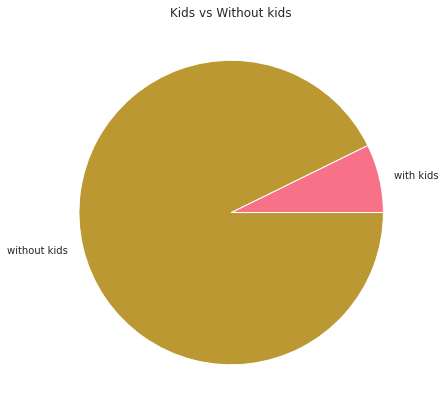

In [ ]:
# number of adults traveling with kids/babies

x = ["with kids", "without kids"]
y = [hoteldb[(hoteldb.children != 0) | (hoteldb.babies != 0)]["adults"].count(), hoteldb[(hoteldb.children == 0) | (hoteldb.babies == 0)]["adults"].count()]

fig = plt.figure(figsize =(10, 7))
colors = sns.color_palette('husl')
plt.pie(y, labels = x, colors = colors)
plt.title("Kids vs Without kids")
plt.show()

In [14]:
#@title What is the booking ratio between Resort Hotel and City Hotel?
hoteldb_not_canceled = hoteldb[hoteldb['is_canceled'] == 0]

x,y = get_count(hoteldb_not_canceled['arrival_date_year'])
plot(x,y, x_label='Year', y_label='Total Booking (%)', title='Year comparison')

NameError: ignored

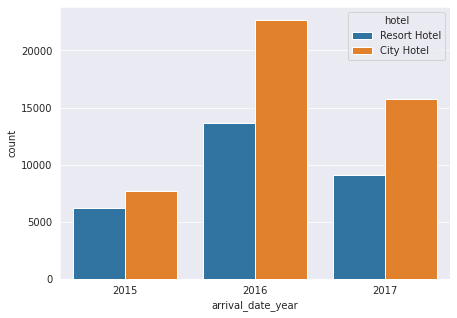

In [ ]:
#More than double bookings were made in 2016, compared to the previous year. But the bookings decreased by almost 15% the next year.
#Let’s separate it by the hotel and then plot the diagram. We will change our code to display the countplot.

plt.subplots(figsize=(7,5))
sns.countplot(x='arrival_date_year', hue='hotel',  data=hoteldb_not_canceled);

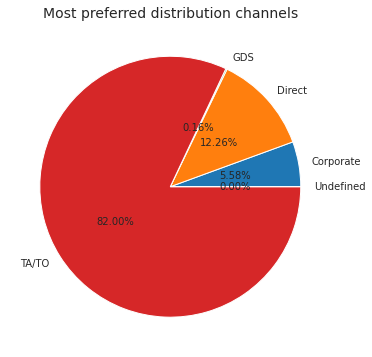

In [ ]:
# most preferred channel for booking hotels

grup_by_dc = hoteldb.groupby(['distribution_channel'])
dc1 = pd.DataFrame(round((grup_by_dc.size()/hoteldb.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize=(12,6))
data = dc1['Booking_%']
labels = dc1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%",  labels=labels, pctdistance=0.5)
plt.title("Most preferred distribution channels", fontsize=14);

Text(0.5, 1.0, 'Resort Hotel')

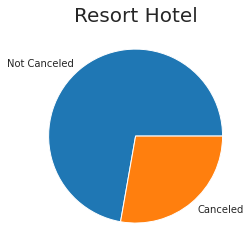

In [ ]:
#cancellation count

resort_cancellation=hoteldb[hoteldb["hotel"]=="Resort Hotel"]["is_canceled"].value_counts()
city_cancellation=hoteldb[hoteldb['hotel']=='City Hotel']["is_canceled"].value_counts()
total_cancel=hoteldb['is_canceled'].value_counts()
#cancellations ratio in resort hotels


plt.pie(resort_cancellation,labels=["Not Canceled","Canceled"])
plt.title("Resort Hotel", fontsize=20)

In [ ]:
hoteldb.groupby(['is_repeated_guest'])['is_repeated_guest'].count()

is_repeated_guest
0    115455
1      3755
Name: is_repeated_guest, dtype: int64

Text(0.5, 1.0, 'Proportion of Repeated Guests')

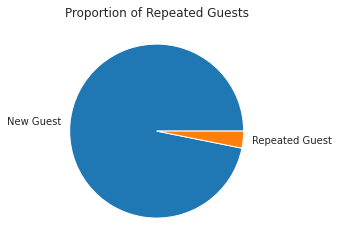

In [ ]:
#repeated guests ratio

plt.pie(hoteldb["is_repeated_guest"].value_counts(), labels=["New Guest","Repeated Guest"])
plt.title ("Proportion of Repeated Guests")

In [ ]:
#@title Bivariate Analysis :
#In a Bivariate Analysis, we try to analyze two features instead of one, and finally determine the classification of output we are looking for.

#Finding total unique value counts for every month for busiest month

counts_per_month= hoteldb.arrival_date_month.value_counts()
counts_per_month

August       13861
July         12644
May          11780
October      11147
April        11078
June         10929
September    10500
March         9768
February      8052
November      6771
December      6759
January       5921
Name: arrival_date_month, dtype: int64

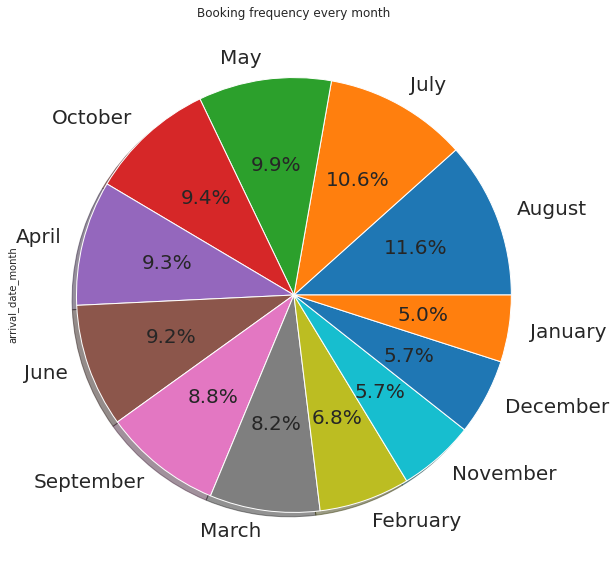

In [ ]:
# plotting it
counts_per_month.plot.pie(figsize=(15,10), title='Booking frequency every month', autopct='%1.1f%%' , fontsize=20 , shadow=True)

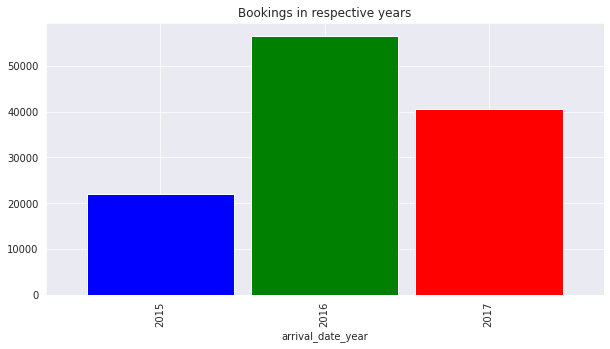

In [ ]:
#Bookings statistics yearwise

total_hotel_booking=hoteldb.groupby('arrival_date_year')['hotel'].count()
total_hotel_booking
diagram=total_hotel_booking.plot(kind='bar', width=0.9 ,color=['b','g','r','c','m','y','k'],figsize=(10,5), title = 'Bookings in respective years')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


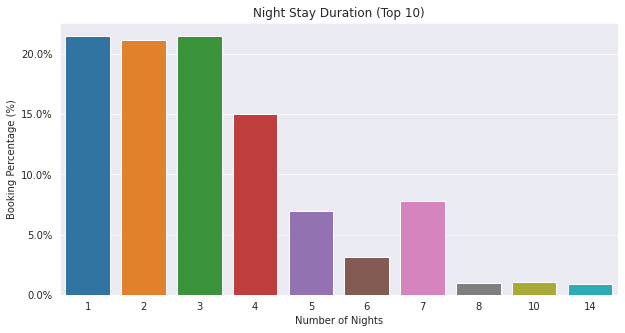

In [ ]:
#@title How Long People Stay in the hotel?
total_nights = hoteldb_not_canceled['stays_in_weekend_nights']+ hoteldb_not_canceled['stays_in_week_nights']
x,y = get_count(total_nights, limit=10)

plot(x,y, x_label='Number of Nights', y_label='Booking Percentage (%)', title='Night Stay Duration (Top 10)', figsize=(10,5))

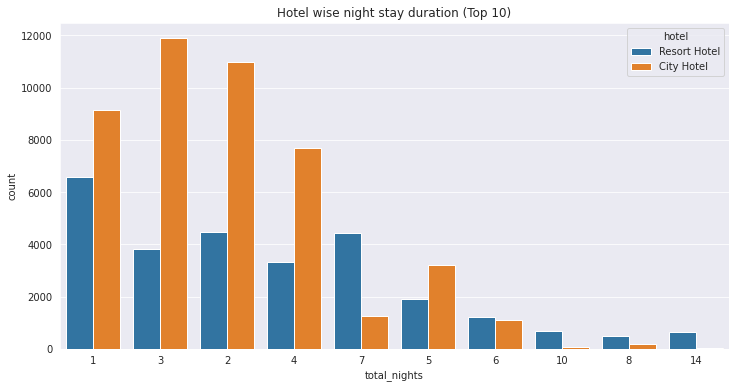

In [ ]:
hoteldb_not_canceled.loc[:,'total_nights'] = hoteldb_not_canceled['stays_in_weekend_nights']+ hoteldb_not_canceled['stays_in_week_nights']

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel wise night stay duration (Top 10)')
sns.countplot(x='total_nights', hue='hotel', data=hoteldb_not_canceled,
              order = hoteldb_not_canceled.total_nights.value_counts().iloc[:10].index, ax=ax);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


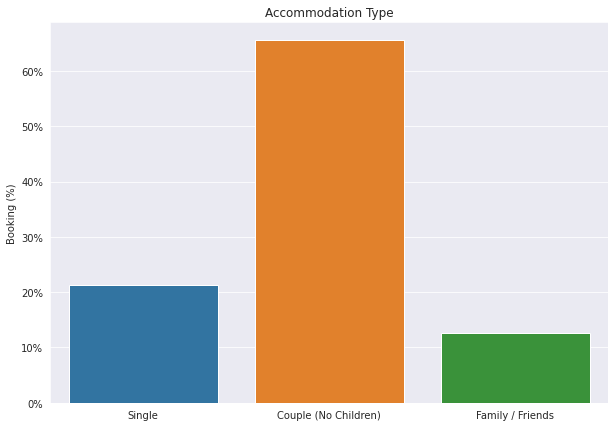

In [ ]:
#Which was the most booked accommodation type (Single, Couple, Family)?
## Select single, couple, multiple adults and family
single   = hoteldb_not_canceled[(hoteldb_not_canceled.adults==1) & (hoteldb_not_canceled.children==0) & (hoteldb_not_canceled.babies==0)]
couple   = hoteldb_not_canceled[(hoteldb_not_canceled.adults==2) & (hoteldb_not_canceled.children==0) & (hoteldb_not_canceled.babies==0)]
family   = hoteldb_not_canceled[hoteldb_not_canceled.adults + hoteldb_not_canceled.children + hoteldb_not_canceled.babies > 2]


## Make the list of Category names, and their total percentage
names = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/hoteldb_not_canceled.shape[0]*100 for x in count]


## Draw the curve
plot(names,count_percent,  y_label='Booking (%)', title='Accommodation Type', figsize=(10,7))

In [ ]:
#@title Requirement of car parking spaces year and month wise


Text(0.5, 0, 'Months')

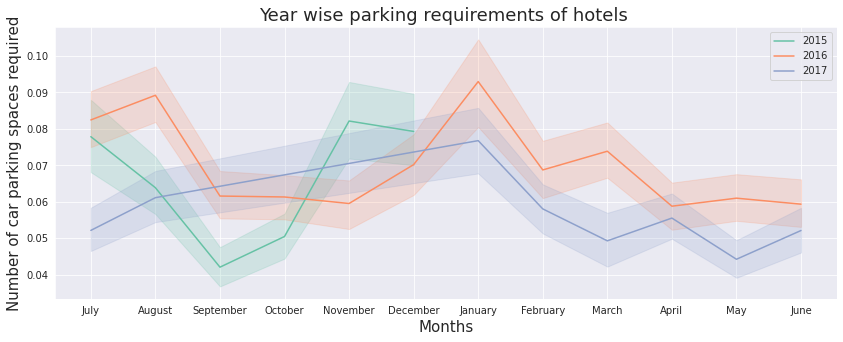

In [ ]:
#Creating a line chart to express the relation between the required number of car parking spaces and year by using seaborn

plt.figure(figsize=(14,5))
sns.lineplot(data=hoteldb,x="arrival_date_month", y="required_car_parking_spaces", hue = 'arrival_date_year', palette= 'Set2')
plt.legend(['2015', '2016', '2017'])
plt.title("Year wise parking requirements of hotels ", fontsize = 18)
plt.ylabel("Number of car parking spaces required",fontsize = 15)
plt.xlabel("Months",fontsize = 15)

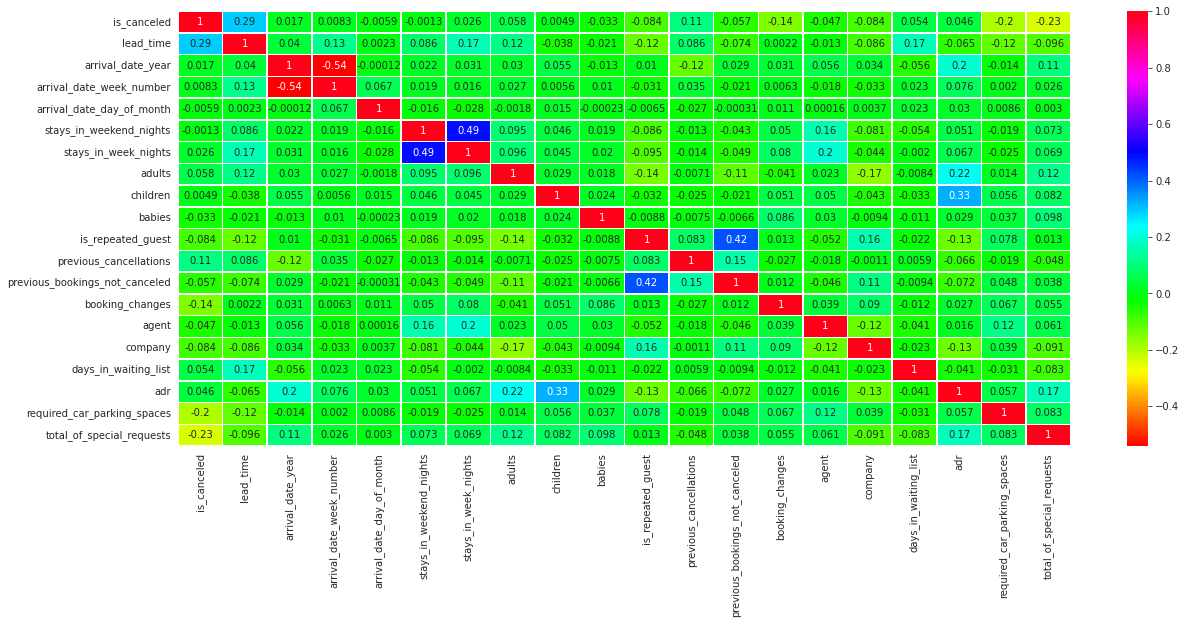

In [ ]:
# correlation graph of the data using heatmap

fig, ax = plt.subplots(figsize=(20,8))
dataplot = sns.heatmap(hoteldb.corr(), cmap="hsv", annot=True, linewidths=.5)
plt.show()

In [ ]:
#@title Correlation Analysist


In [ ]:
correlation = hoteldb.corr()
correlation

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.292876,0.016622,0.008315,-0.005948,-0.001323,0.025542,0.058182,0.004851,-0.032569,-0.083745,0.110139,-0.057365,-0.144832,-0.046770,-0.083594,0.054301,0.046492,-0.195701,-0.234877
lead_time,0.292876,1.000000,0.040334,0.127046,0.002306,0.085985,0.166892,0.117575,-0.037878,-0.021003,-0.123209,0.086025,-0.073599,0.002230,-0.013114,-0.085854,0.170008,-0.065018,-0.116624,-0.095949
arrival_date_year,0.016622,0.040334,1.000000,-0.540373,-0.000121,0.021694,0.031203,0.030266,0.054710,-0.013192,0.010281,-0.119905,0.029234,0.031416,0.056438,0.033682,-0.056348,0.198429,-0.013812,0.108610
arrival_date_week_number,0.008315,0.127046,-0.540373,1.000000,0.066572,0.018629,0.016047,0.026567,0.005556,0.010417,-0.031125,0.035493,-0.021009,0.006311,-0.018225,-0.032912,0.022677,0.076281,0.001980,0.026202
arrival_date_day_of_month,-0.005948,0.002306,-0.000121,0.066572,1.000000,-0.016225,-0.028362,-0.001754,0.014550,-0.000235,-0.006471,-0.027027,-0.000306,0.011266,0.000159,0.003667,0.022532,0.030291,0.008569,0.003026
stays_in_weekend_nights,-0.001323,0.085985,0.021694,0.018629,-0.016225,1.000000,0.494175,0.094759,0.046135,0.018607,-0.086009,-0.012769,-0.042859,0.050191,0.162411,-0.080783,-0.054399,0.050670,-0.018520,0.073124
stays_in_week_nights,0.025542,0.166892,0.031203,0.016047,-0.028362,0.494175,1.000000,0.096214,0.044652,0.020373,-0.095302,-0.013976,-0.048873,0.080018,0.196777,-0.044437,-0.002026,0.066847,-0.024933,0.068738
adults,0.058182,0.117575,0.030266,0.026567,-0.001754,0.094759,0.096214,1.000000,0.029409,0.017890,-0.140973,-0.007070,-0.108856,-0.041472,0.023370,-0.166182,-0.008365,0.224253,0.014438,0.123353
children,0.004851,-0.037878,0.054710,0.005556,0.014550,0.046135,0.044652,0.029409,1.000000,0.023999,-0.032475,-0.024755,-0.021078,0.051000,0.050461,-0.042554,-0.033293,0.325057,0.056247,0.081747
babies,-0.032569,-0.021003,-0.013192,0.010417,-0.000235,0.018607,0.020373,0.017890,0.023999,1.000000,-0.008813,-0.007509,-0.006552,0.085605,0.030235,-0.009426,-0.010627,0.029043,0.037389,0.097939


1) Stays in week night and total stay are positively corelated, even more than weekend nights which says, longer stays are in week time only.

2) lead_time and total_stay is positively corelated. That means more is the stay of customer more will be the lead time.

3) Total people, total stay and ADR has positive correlation which means more the people, longer the stay will give more revenue.

4) is_repeated guest and previous bookings not canceled has strong correlation. may be repeated guests are not more likely to cancel their bookings.

5) adults and lead time a positively corelated which means more the adults more the lead time

6) children and lead time a re negatively co-related means more the children lesser the lead time.

7) ADR and children are very positively corelated, which states more the children more is the revenue.

In [ ]:
#@title INSIGHTS DRAWN


1. Ratio of bookings - 66.4%- City hotels & 33.6% - Resort hotels
2. Most customers are from Portugal, followed by Great Britain, France and Spain.
3. City hotels are more booked more compared to resort hotels
4. Most bookings were done in 2016
5. Cancellations of resort hotels is comparitively less than city hotels
6. Repeated customers are very less. Quality of service needs to improve
7. In case of resort hotels ADR was highest in august and lowest during november and january
8. In case of city hotels ADR was highest in may and lowest during january
9. On an average, May-June is the busier and most profitable month for the hotels.
10. Ratio of guests with kids is less than the ratio of guests without kids.
11. Since retention is low and most of them are new guests, hotel needs to make specific changes. 
12. Online travel agencies exceeds offline travel agencies and direct booking by far except for Portugal,in which online travel agencies and offline travel agencies are almost equal.
13. We can see that 'A' type room is most in demand but on contrary room type 'H', 'G' and 'F' are most adr genrating rooms respectively
14. Online Market segments gets a lot of customers in comparison to other modes.
15. BB (Bed and Breakfast) is the most preferred meal type by the guest

**CONCLUSION** :
After careful analysis , we can conclude that the hotel industry can benefit a lot by studying the type of customers, their booking mode, the booking month and the seasons. The hotel industry market, their ADR and bookings are based on the type of customers,the month, types of meal, hotel type ,their country of origin, Room types, booking medium and many others.*italicized text*

# **SUGGESTIONS**

1. The hotel industry can take the advantage of seasons and months as ADR was highest in august (rainy season).
2. Most customers booked rooms online so they can be targeted with proper seasonal discounts and vacay-ads.
3. Since ADR was least during Nov and Jan, winter discounts(assumption) or off season discounts might help. 
4. For retention, they should introduce portugese meals(sea foods and meat) and eastern european meals as guests are more from there.
5. They should encourage direct bookings by offering some special discounts as online bookings cancellation is high.
6. Since room A is booked more, they should take into account the factors how it is different from other rooms and implement the same in other rooms as well.
7. Since resort hotels are less preferred, they should look into the factors- might be High cost or guests requirements.